In [1]:
#Data Preparation
!pip install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
# reading csv files
data =  pd.read_csv("C:/Users/Mohsen/Desktop/bank.csv")
df=pd.DataFrame(data)
df.shape

(4521, 17)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [3]:
# IS THERE ANY MISSING DATA?
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [5]:

df= df.replace(to_replace = -1, value = 999)
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,999,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,999,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,999,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,999,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,999,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [6]:
df= df.replace(to_replace = 'unknown', value = 0)
df= df.replace(to_replace = 'failure', value = 1)
df= df.replace(to_replace = 'other', value = 2)
df= df.replace(to_replace = 'primary', value = 1)
df= df.replace(to_replace = 'secondary', value = 2)
df= df.replace(to_replace = 'tertiary', value = 3)
df= df.replace(to_replace = 'no', value = 1)
df= df.replace(to_replace = 'yes', value = 2)
df= df.replace(to_replace = 'nonexistent', value = 2)
df= df.replace(to_replace = 'success', value = 3)
df.head(100)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,1,1,1787,1,1,cellular,19,oct,79,1,999,0,0,1
1,33,services,married,2,1,4789,2,2,cellular,11,may,220,1,339,4,1,1
2,35,management,single,3,1,1350,2,1,cellular,16,apr,185,1,330,1,1,1
3,30,management,married,3,1,1476,2,2,0,3,jun,199,4,999,0,0,1
4,59,blue-collar,married,2,1,0,2,1,0,5,may,226,1,999,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,41,0,single,3,1,1567,1,1,cellular,1,jul,291,2,999,0,0,1
96,41,admin.,married,3,1,5426,2,1,0,14,may,149,2,999,0,0,1
97,30,admin.,single,3,1,261,1,1,cellular,19,oct,233,1,137,20,1,1
98,36,blue-collar,divorced,2,1,2843,1,1,cellular,12,feb,473,1,182,1,3,1


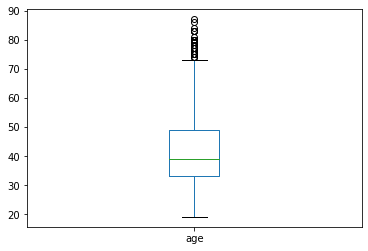

In [7]:
import matplotlib.pyplot as plt
#Simple boxplot using pandas
df['age'].plot(kind='box')


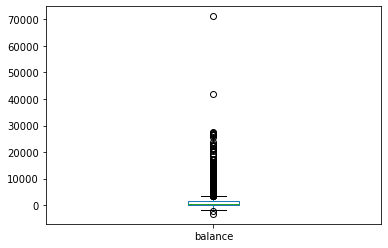

In [8]:
df['balance'].plot(kind='box')

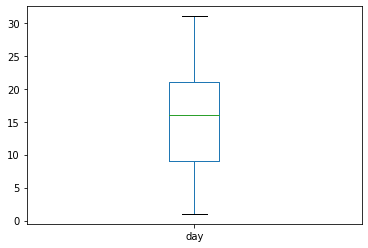

In [9]:
df['day'].plot(kind='box')

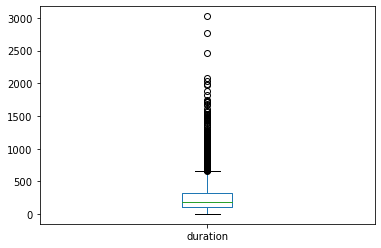

In [10]:
df['duration'].plot(kind='box')

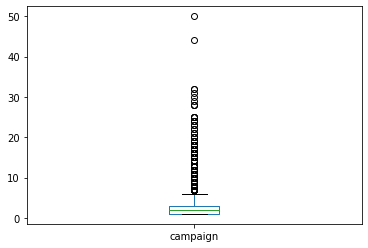

In [11]:
df['campaign'].plot(kind='box')

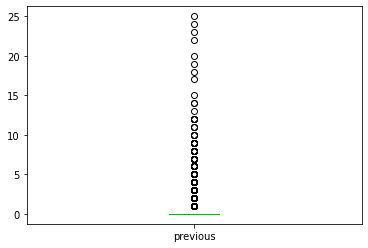

In [12]:
df['previous'].plot(kind='box')

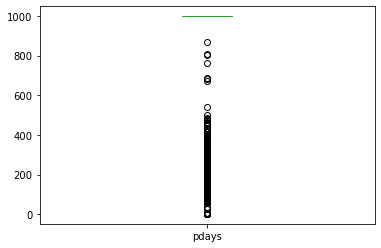

In [13]:
df['pdays'].plot(kind='box')

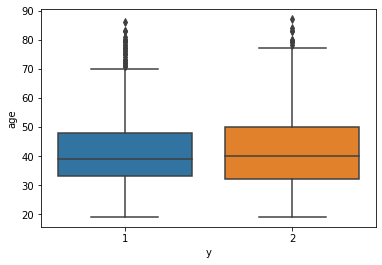

In [14]:
import seaborn as sns
ax = sns.boxplot(x=df['y'], y=df['age'], data=df)

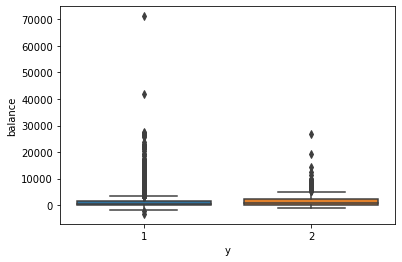

In [15]:
ax = sns.boxplot(x=df['y'], y=df['balance'], data=df)

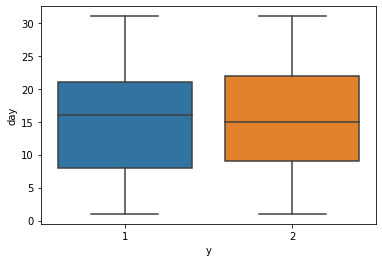

In [16]:
ax = sns.boxplot(x=df['y'], y=df['day'], data=df)

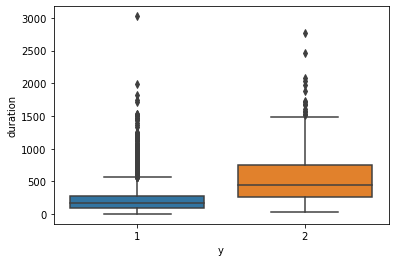

In [17]:
ax = sns.boxplot(x=df['y'], y=df['duration'], data=df)

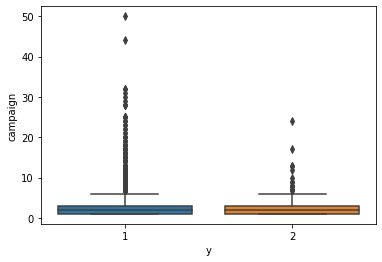

In [18]:
ax = sns.boxplot(x=df['y'], y=df['campaign'], data=df)

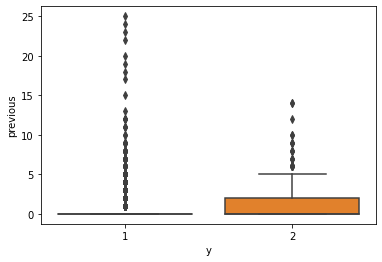

In [19]:
ax = sns.boxplot(x=df['y'], y=df['previous'], data=df)

In [20]:
df.describe()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,2.065915,1.016810,1423.763769,1.566025,1.152842,15.915284,263.961292,2.793630,859.275603,0.542579,0.281132,1.115240
std,10.576211,0.780906,0.128575,3009.298429,0.495676,0.359875,8.247667,259.856633,3.109807,301.892276,1.693562,0.678637,0.319347
min,19.000000,0.000000,1.000000,-3313.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,33.000000,2.000000,1.000000,70.000000,1.000000,1.000000,9.000000,104.000000,1.000000,999.000000,0.000000,0.000000,1.000000
50%,39.000000,2.000000,1.000000,447.000000,2.000000,1.000000,16.000000,185.000000,2.000000,999.000000,0.000000,0.000000,1.000000
75%,49.000000,3.000000,1.000000,1480.000000,2.000000,1.000000,21.000000,329.000000,3.000000,999.000000,0.000000,0.000000,1.000000
max,87.000000,3.000000,2.000000,71188.000000,2.000000,2.000000,31.000000,3025.000000,50.000000,999.000000,25.000000,3.000000,2.000000


In [21]:
#Which attributes seem to be correlated
correlation =df.corr(method='pearson')
correlation

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.199345,-0.017885,0.083865,-0.193888,-0.011250,-0.017853,-0.002367,-0.005148,-0.025137,-0.003511,0.025856,0.045092
education,-0.199345,1.000000,-0.008835,0.035516,-0.031251,0.016102,0.013508,-0.003246,0.019268,-0.035455,0.027320,0.023054,0.050265
default,-0.017885,-0.008835,1.000000,-0.070370,0.006881,0.063994,-0.013261,-0.011615,-0.012348,0.040958,-0.026656,-0.031354,0.001303
balance,0.083865,0.035516,-0.070370,1.000000,-0.050504,-0.071513,-0.008656,-0.016158,-0.009622,-0.039824,0.026082,0.033793,0.017774
housing,-0.193888,-0.031251,0.006881,-0.050504,1.000000,0.018451,-0.031291,0.015740,-0.003574,-0.041253,0.038621,0.006302,-0.104683
loan,-0.011250,0.016102,0.063994,-0.071513,0.018451,1.000000,-0.004879,-0.004997,0.017120,0.042064,-0.022115,-0.053685,-0.070517
day,-0.017853,0.013508,-0.013261,-0.008656,-0.031291,-0.004879,1.000000,-0.024629,0.160706,0.064393,-0.059114,-0.062505,-0.011244
duration,-0.002367,-0.003246,-0.011615,-0.016158,0.015740,-0.004997,-0.024629,1.000000,-0.068382,-0.015973,0.018080,0.035247,0.401118
campaign,-0.005148,0.019268,-0.012348,-0.009622,-0.003574,0.017120,0.160706,-0.068382,1.000000,0.118659,-0.067833,-0.104276,-0.061147
pdays,-0.025137,-0.035455,0.040958,-0.039824,-0.041253,0.042064,0.064393,-0.015973,0.118659,1.000000,-0.678335,-0.888941,-0.171931


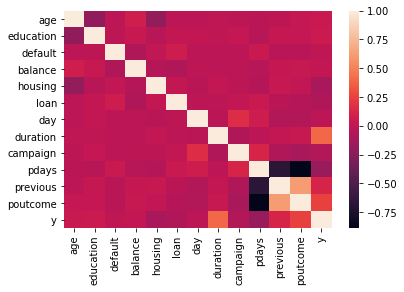

In [22]:
sns.heatmap(correlation)

In [23]:
#correaltions between attributes is so low except previous and pdays have strong relationship
#Therefore it increases multicollinearity if we consider both variables then I drop 'previous'.

In [24]:
df= df.drop(labels=['previous'], axis=1)

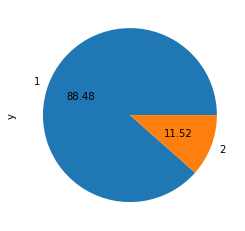

In [25]:
# balanced dataset and Normalize the dataset 
df['y'].value_counts()
# dataset is imbalanced 
df['y'].value_counts().plot.pie(autopct='%.2f')

In [26]:
#Handling Outliers in the data

In [27]:
a = pd.DataFrame(df.skew(), columns=['Skewness'])
b = pd.DataFrame(df.kurt(), columns=['Kurtosis'])
tdf = a.join(b)
tdf.head(100)

,Skewness,Kurtosis
age,0.699501,0.348775
education,-0.636926,0.160915
default,7.519405,54.565595
balance,6.597676,88.421844
housing,-0.266522,-1.929820
loan,1.930177,1.726345
day,0.094627,-1.039531
duration,2.772420,12.530050
campaign,4.743914,37.168920
pdays,-1.756698,1.224225


In [28]:
print(df['age'].quantile(0.1))
print(df['age'].quantile(0.9))

29.0
56.0


In [29]:
df['age']=np.where(df['age']<29.0,29.0,df['age'])
df['age']=np.where(df['age']>56.0,56.0,df['age'])


In [30]:
print(df['balance'].quantile(0.1))
print(df['balance'].quantile(0.9))

0.0
3913.0


In [31]:
df['balance']=np.where(df['balance']<0.0,0.0,df['balance'])
df['balance']=np.where(df['balance']>3913.0,3913.0,df['balance'])

In [32]:
print(df['day'].quantile(0.1))
print(df['day'].quantile(0.9))

5.0
28.0


In [33]:
df['day']=np.where(df['day']<5.0,5.0,df['day'])
df['day']=np.where(df['day']>28.0,28.0,df['day'])

In [34]:
print(df['duration'].quantile(0.1))
print(df['duration'].quantile(0.9))

58.0
579.0


In [35]:
df['duration']=np.where(df['duration']<58.0,58.0,df['duration'])
df['duration']=np.where(df['duration']>579.0,579.0,df['duration'])

In [36]:
print(df['pdays'].quantile(0.1))
print(df['pdays'].quantile(0.9))

221.0
999.0


In [37]:
df['pdays']=np.where(df['pdays']<183,183,df['pdays'])
df['pdays']=np.where(df['pdays']>183.0,183.0,df['pdays'])

In [40]:
print(df['campaign'].quantile(0.1))
print(df['campaign'].quantile(0.9))

1.0
6.0


In [41]:
df['campaign']=np.where(df['campaign']<1.0,1.0,df['campaign'])
df['campaign']=np.where(df['campaign']>6.0,6.0,df['campaign'])

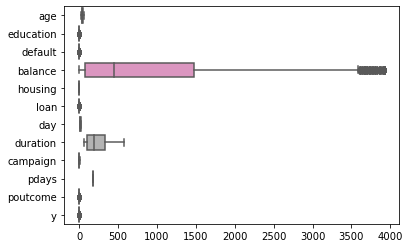

In [42]:
# Final dataset after solving problem oulier and multicolinearity
ax = sns.boxplot(data=df, orient="h", palette="Set2")

In [43]:
x= df.drop(labels=['y','job','marital','month','contact'], axis=1)
y= df['y']

Requirement already up-to-date: imbalanced-learn in c:\users\mohsen\anaconda3\lib\site-packages (0.8.1)


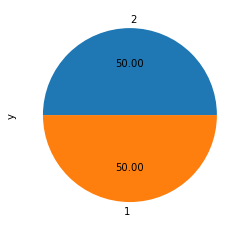

In [44]:
# balanced data set
# import library
!pip install -U imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_res,Y_res = rus.fit_resample(x,y)
ax= Y_res.value_counts().plot.pie(autopct='%.2f')

In [45]:
# Split data set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_res,Y_res, test_size=0.30, random_state=1)

In [46]:
# Normalize data set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
#Random Forests
# Feature Scaling
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
model = clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
Y_test.shape
Y_pred.shape
#Import scikit-learn metrics module for accuracy calculation
#Evaluating the Algorithm
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("area under curve (auc): ", metrics.roc_auc_score(Y_test, Y_pred))

Mean Absolute Error: 0.20447284345047922
Mean Squared Error: 0.20447284345047922
Root Mean Squared Error: 0.45218673515537716
Accuracy: 0.7955271565495208
Precision: 0.8012820512820513
Recall: 0.7911392405063291
area under curve (auc):  0.7955696202531646


In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[125  33]
 [ 31 124]]
              precision    recall  f1-score   support

           1       0.80      0.79      0.80       158
           2       0.79      0.80      0.79       155

    accuracy                           0.80       313
   macro avg       0.80      0.80      0.80       313
weighted avg       0.80      0.80      0.80       313



In [49]:
# Evaluate a Random Forest model using k-fold cross-validation
# prepare the cross-validation procedure
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# Evaluate model
scores = cross_val_score(model, X_test, Y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
precision = cross_val_score(model, X_train, Y_train, cv=10, scoring='precision')
print('Precision: ' , mean(precision))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
recall = cross_val_score(model, X_train, Y_train, cv=10, scoring='recall')
print('Recall: ' , mean(precision))
# View confusion matrix for test data and predictions
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

Accuracy: 0.751 (0.080)
Precision:  0.8211980299809246
Mean Absolute Error: 0.20447284345047922
Mean Squared Error: 0.20447284345047922
Root Mean Squared Error: 0.45218673515537716
Recall:  0.8211980299809246


array([[125,  33],
       [ 31, 124]], dtype=int64)

In [50]:
# Area under the precision-recall curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(Y_test, probs)
print('AUC: %.2f' % auc)
precision = cross_val_score(model, X_train, Y_train, cv=10, scoring='precision')
print('Precision: ' , mean(precision))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
recall = cross_val_score(model, X_train, Y_train, cv=10, scoring='recall')
print('Recall: ' , mean(precision))
# View confusion matrix for test data and predictions
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

AUC: 0.88
Precision:  0.823961215946043
Mean Absolute Error: 0.20447284345047922
Mean Squared Error: 0.20447284345047922
Root Mean Squared Error: 0.45218673515537716
Recall:  0.823961215946043


array([[125,  33],
       [ 31, 124]], dtype=int64)

In [51]:
#K Nearest Neighbor(KNN)
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
#Train the model using the training sets
knn.fit(X_train, Y_train)
#Predict the response for test dataset
Y_pred = knn.predict(X_test)

In [52]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Mean Absolute Error: 0.28115015974440893
Mean Squared Error: 0.28115015974440893
Root Mean Squared Error: 0.530235947238971
Accuracy: 0.7188498402555911


In [53]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print("area under curve (auc): ", metrics.roc_auc_score(Y_test, Y_pred))

[[126  32]
 [ 56  99]]
              precision    recall  f1-score   support

           1       0.69      0.80      0.74       158
           2       0.76      0.64      0.69       155

    accuracy                           0.72       313
   macro avg       0.72      0.72      0.72       313
weighted avg       0.72      0.72      0.72       313

area under curve (auc):  0.7180890159248673


In [54]:
print('Accuracy',scores.mean())
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("area under curve (auc): ", metrics.roc_auc_score(Y_test, Y_pred))

Accuracy 0.7505040322580645
Precision: 0.6923076923076923
Recall: 0.7974683544303798
area under curve (auc):  0.7180890159248673


In [55]:
# import k-folder
from sklearn.model_selection import cross_val_score
# use the same model as before
knn = KNeighborsClassifier(n_neighbors = 3)
# X,y will automatically devided by 3 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
# print all 5 times scores 
print(scores)
# then I will do the average about these five scores to get more accuracy score.
print('Accuracy',scores.mean())
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

[0.68493151 0.73972603 0.79452055 0.76712329 0.7260274  0.7260274
 0.75342466 0.76712329 0.83561644 0.86111111]
Accuracy 0.7655631659056317
Mean Absolute Error: 0.28115015974440893


In [56]:
#Area under the precision-recall curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(Y_pred, probs)
print('AUC: %.2f' % auc)

AUC: 0.90


In [57]:
## Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)
#Predict the response for test dataset
Y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Accuracy: 0.7348242811501597
Precision: 0.8
Recall: 0.6329113924050633
Mean Absolute Error: 0.26517571884984026


In [58]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[100  58]
 [ 25 130]]
              precision    recall  f1-score   support

           1       0.80      0.63      0.71       158
           2       0.69      0.84      0.76       155

    accuracy                           0.73       313
   macro avg       0.75      0.74      0.73       313
weighted avg       0.75      0.73      0.73       313



In [81]:
# Accuracy and Cross validation for decision tree
from sklearn.model_selection import cross_val_score
# use the same model as before
clf = clf.fit(X_train,Y_train)
# X,y will automatically devided by 3 folder, the scoring I will still use the accuracy
scores = cross_val_score(clf, X_train, Y_train, cv=10, scoring='accuracy')
# print all 5 times scores 
print(scores)
# then I will do the average about these five scores to get more accuracy score.
print('Accuracy',scores.mean())
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('f1:', f1_score(Y_test, Y_pred))

[0.7260274  0.80821918 0.76712329 0.75342466 0.7260274  0.76712329
 0.75342466 0.76712329 0.79452055 0.77777778]
Accuracy 0.7640791476407914
Mean Absolute Error: 0.23003194888178913
f1: 0.7763975155279502


In [60]:
# Area under the precision-recall curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(Y_pred, probs)
print('AUC: %.2f' % auc)

AUC: 0.92


[Text(167.4, 190.26, 'X[7] <= -0.486\nentropy = 1.0\nsamples = 729\nvalue = [363, 366]'),
 Text(83.7, 135.9, 'X[10] <= 2.054\nentropy = 0.703\nsamples = 299\nvalue = [242, 57]'),
 Text(41.85, 81.53999999999999, 'X[7] <= -1.248\nentropy = 0.616\nsamples = 282\nvalue = [239, 43]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.111\nsamples = 68\nvalue = [67, 1]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.714\nsamples = 214\nvalue = [172, 42]'),
 Text(125.55000000000001, 81.53999999999999, 'X[7] <= -0.98\nentropy = 0.672\nsamples = 17\nvalue = [3, 14]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.353\nsamples = 15\nvalue = [1, 14]'),
 Text(251.10000000000002, 135.9, 'X[10] <= 1.019\nentropy = 0.857\nsamples = 430\nvalue = [121, 309]'),
 Text(209.25, 81.53999999999999, 'X[7] <= 1.258\nentropy = 0.913\nsamples = 354\nvalue = [116, 238]'),
 Text(188.32500000000002, 27.180000000000007, 'e

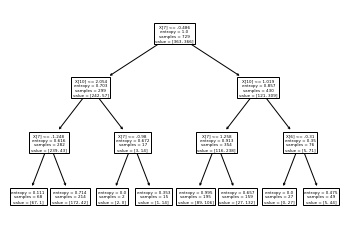

In [61]:
from sklearn import tree
tree.plot_tree(clf)

In [62]:
#Support Vector Machine
Y_train=Y_train.astype(float)
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, Y_train)

SVC(degree=8, kernel='poly')

In [63]:
from sklearn import svm
clf_svm = svm.LinearSVC(random_state=7)
model = clf_svm.fit(X_train, Y_train)  
Y_pred=clf_svm.predict(X_train)
Y_pred = svclassifier.predict(X_test)

C:\Users\Mohsen\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [64]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[143  15]
 [116  39]]
              precision    recall  f1-score   support

           1       0.55      0.91      0.69       158
           2       0.72      0.25      0.37       155

    accuracy                           0.58       313
   macro avg       0.64      0.58      0.53       313
weighted avg       0.64      0.58      0.53       313



In [75]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Accuracy: 0.7699680511182109
Precision: 0.7621951219512195
Recall: 0.7911392405063291
Mean Absolute Error: 0.23003194888178913


In [80]:
# Accuracy with Cross validation for SVM 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
model = svc.fit(X_train, Y_train)
# evaluate model
scores = cross_val_score(model, X_test, Y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("area under curve (auc): ", metrics.roc_auc_score(Y_test, Y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('f1:', f1_score(Y_test, Y_pred))

Accuracy: 0.770 (0.082)
Precision: 0.7621951219512195
Recall: 0.7911392405063291
area under curve (auc):  0.7697631686402614
Mean Absolute Error: 0.23003194888178913
f1: 0.7763975155279502


In [67]:
# Neural Network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
model = mlp.fit(X_train,Y_train)
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_train,predict_train))
print(classification_report(Y_train,predict_train))
# Area under curve
print("area under curve (auc): ", metrics.roc_auc_score(Y_test, Y_pred))

[[303  60]
 [ 58 308]]
              precision    recall  f1-score   support

         1.0       0.84      0.83      0.84       363
         2.0       0.84      0.84      0.84       366

    accuracy                           0.84       729
   macro avg       0.84      0.84      0.84       729
weighted avg       0.84      0.84      0.84       729

area under curve (auc):  0.5783380971825234


C:\Users\Mohsen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [79]:
# Accuracy with Cross validation for Neural Networks
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_test, Y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("area under curve (auc): ", metrics.roc_auc_score(Y_test, Y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('f1:', f1_score(Y_test, Y_pred))

Accuracy: 0.757 (0.077)
Precision: 0.7621951219512195
Recall: 0.7911392405063291
area under curve (auc):  0.7697631686402614
Mean Absolute Error: 0.23003194888178913
f1: 0.7763975155279502


In [69]:
# train-test split evaluation of xgboost model
from numpy import loadtxt
!pip install xgboost
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# fit model no training data
model = XGBClassifier()
model.fit(X_train, Y_train)
# make predictions for test data
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]
cm = confusion_matrix(Y_test, Y_pred)
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

C:\Users\Mohsen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:34:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 77.00%
Accuracy: 0.7699680511182109
Precision: 0.7621951219512195
Recall: 0.7911392405063291
Mean Absolute Error: 0.23003194888178913


In [70]:
print("area under curve (auc): ", metrics.roc_auc_score(Y_test, Y_pred))

area under curve (auc):  0.7697631686402614


In [71]:
#Logistic Regression
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,Y_train)
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Accuracy: 0.7699680511182109
Precision: 0.7621951219512195
Recall: 0.7911392405063291
Mean Absolute Error: 0.23003194888178913


In [77]:
# Evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# Evaluate model
scores = cross_val_score(model, X_test, Y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("area under curve (auc): ", metrics.roc_auc_score(Y_test, Y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('f1:', f1_score(Y_test, Y_pred))


Accuracy: 0.757 (0.077)
Precision: 0.7621951219512195
Recall: 0.7911392405063291
area under curve (auc):  0.7697631686402614
Mean Absolute Error: 0.23003194888178913
f1: 0.7763975155279502


In [73]:
#the Naive Bayes Algorithm
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Training the Naive Bayes model on the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
model =classifier.fit(X_train, Y_train)
y_pred  =  classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
ac = accuracy_score(Y_test,Y_pred)
# Acuracy
ac
# CONFUSION MATRIX
cm

array([[125,  33],
       [ 39, 116]], dtype=int64)

In [78]:
# Accuracy and Cross validation
from sklearn.model_selection import cross_val_score
# use the same model as before
clf = clf.fit(X_train,Y_train)
# X,y will automatically devided by 3 folder, the scoring I will still use the accuracy
scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
# print all 5 times scores 
print(scores)
# then I will do the average about these five scores to get more accuracy score.
print('Accuracy',scores.mean())
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("area under curve (auc): ", metrics.roc_auc_score(Y_test, Y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('f1:', f1_score(Y_test, Y_pred))

[0.83561644 0.73972603 0.83561644 0.82191781 0.7260274  0.80821918
 0.80821918 0.76712329 0.84931507 0.81944444]
Accuracy 0.8011225266362253
Precision: 0.7621951219512195
Recall: 0.7911392405063291
area under curve (auc):  0.7697631686402614
Mean Absolute Error: 0.23003194888178913
f1: 0.7763975155279502
